# Session 3

* Clustering: K-means Clustering (Customer Segmentation)
* Clustering: Hierarchical (Stock Analysis)
*   Feature Engineering
* Feature Selection
* Metrics (Classification, Regression)



---

Version 1.0

Michael de la Maza

AI/ML

Hult International business School

Adapted from "Approaching (Almost) Any Machine Learning Problem" by Abhishek Thakur

# Clustering: K-means

In [161]:
# Customer segmentation - Marketing case study

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns


In [162]:
dataset = pd.read_csv('Mall_Customers.csv')

In [ ]:
dataset.head()

In [ ]:
dataset.shape

In [ ]:
# Histogram of Annual income

sns.histplot(dataset['Annual Income (k$)'],bins=50)

# What do we see? Most income is between $60K and $90K

In [ ]:
# Histogram of spending score

sns.histplot(dataset['Spending Score (1-100)'], bins=50)

# What do we see? Most customers have a spending score between 40 and 60

In [ ]:
# Relationship between annual income and spending score
# Regplot produces linear regression

sns.regplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=dataset)

# What does it show? Not much of a relationship!

In [ ]:
# Relationship between Age and Spending score

sns.regplot(x="Age", y="Spending Score (1-100)", data=dataset)

# What does it show? Negative relationship!

In [ ]:
# K-means clustering

# Focus on annual income and spending score

dataset = dataset.filter(["Annual Income (k$)", "Spending Score (1-100)"], axis=1)

dataset.head()

In [ ]:
# Define object and train

km_model = KMeans(n_clusters = 4, n_init='auto', random_state=42)
km_model.fit(dataset)

print(km_model.cluster_centers_)


In [ ]:
# See labels for all samples

print(km_model.labels_)

In [ ]:
# Visualize
# Data points

plt.scatter(dataset.values[:,0], dataset.values[:,1], c=km_model.labels_, cmap='rainbow')

# Centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c='black')

plt.xlabel('Income')
plt.ylabel('Spending Score')

In [ ]:
# Select K using elbow method

# Search K from 1 to 10

loss = []

for i in range(1, 11):
  km = KMeans(n_clusters = i, n_init='auto', random_state=42).fit(dataset)
  loss.append(km.inertia_)

# Plot elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1,11), loss)
plt.title("Finding Optimal K via Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Loss")
plt.xticks(range(1, 11))
plt.show()

# What is the best K?

In [ ]:
# Redo with K=5

km_model = KMeans(n_clusters = 5, n_init='auto')
km_model.fit(dataset)

# Visualize
# Data points

plt.scatter(dataset.values[:,0], dataset.values[:,1], c=km_model.labels_, cmap='rainbow')

# Centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c='black')

plt.xlabel('Income')
plt.ylabel('Spending Score')

In [ ]:
# Which customers belong to the high income, high spending score cluster?

print(km_model.cluster_centers_)
print(km_model.labels_)

dataset = pd.read_csv('Mall_Customers.csv')

dataset_labels = dataset

dataset_labels['label'] = km_model.labels_

dataset_labels

# High income/high spending score cluster = 86.5, 82.1

In [175]:
# 5 minute exercise

# After listening to your analysis, one of your colleagues suggests a different approach.
# Instead of focusing on high income/high spending score customers, focus on
# high income/low spending customers and encourage them to increase spending.

# What cluster corresponds to high income/low spending in the graph above?
# What is the cluster number? What are the values for income and spending score?
# How many people are in this cluster?





## Hierarchical clustering: Pharmaceutical companies

In [ ]:
# load dataset
pharma_df = pd.read_csv('Pharmaceuticals.csv')
pharma_df.set_index('Symbol', inplace=True)
pharma_df

In [ ]:
# Drop columns that are not of interest for this analysis

pharma_data = pharma_df.drop(columns=['Name', 'Median_Recommendation', 'Location', 'Exchange'])
pharma_data

In [ ]:
# Standardize values - z score
from sklearn import preprocessing

pharma_norm = pharma_data.apply(preprocessing.scale, axis=0)
pharma_norm.head()

In [ ]:
# Create dendogram
# Scipy for scientific computing
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Create dendogram
Z = linkage(pharma_norm, method='ward')

# Plot dendogram
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), squeeze=False)
ax = axes[0,0]
#dendrogram(Z, color_threshold=0, ax=ax, no_labels=True)
dendrogram(Z, color_threshold=0, ax=ax, labels=pharma_norm.index)



In [180]:
# Assign a cluster number to each data point
memb = fcluster(Z, 4, criterion='maxclust')



In [ ]:
# What companies are in which clusters?

# Utility code
# Create a dictionary to store original indices for each cluster
cluster_indices = {}
for i, cluster in enumerate(memb):
  if cluster not in cluster_indices:
    cluster_indices[cluster] = []
  cluster_indices[cluster].append(pharma_data.index[i])

# Print cluster number and original indices
for cluster, indices in cluster_indices.items():
  print(f"\nCluster {cluster}:")
  print(indices)

In [ ]:
# Show average values for each cluster

cluster_data = {}
for key, item in pharma_data.groupby(memb):
    cluster_data['Cluster {}'.format(key)] = item.mean()

pd.DataFrame(cluster_data).round(2)

In [183]:
# 5 minute exercise

# Describe each cluster
# Cluster: Large (market cap), fast growing (Rev_growth), highly profitable (Net_profit_margin)

# Feature Engineering

In [ ]:
# Create dataframe with random values for two features

import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(100,2), columns=['f_1','f_2'])

df.head()

In [ ]:
# Create polynomial features. Similar to what we did in linear regression.

from sklearn import preprocessing

pf = preprocessing.PolynomialFeatures(
    degree = 2, # [1, a, b, a^2, ab, b^2]
    include_bias=False
)

# apply to the features
pf.fit(df)

# create polynomial features and create new dataframe
poly_feats = pf.transform(df)

# Get number of features
num_feats = poly_feats.shape[1]

df_transformed = pd.DataFrame(poly_feats, columns=[f'f_{i}' for i in range(1,num_feats+1)])

df_transformed.head()

# Can create third-degree, fourth-degree, etc. polynomial features

In [ ]:
# Binning continuous features
# Binning can be used to 'convert' continuous features to categorical (e.g., temperature)

df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)
df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)

df.head()

# Feature Selection

In [ ]:
# Eliminate highly correlated features - collinearity

import pandas as pd

from sklearn.datasets import fetch_california_housing

# California housing is a dataset that is good for regression
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

df = pd.DataFrame(X, columns=col_names)

# Add a highly correlated feature

df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)

df.corr()

In [ ]:
# Use Recursive Feature Elimination (RFE) to select features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=3)

rfe.fit(X, y)

X_transformed = rfe.transform(X)

# Which features were selected?
selected_features_mask = rfe.support_
selected_features_names = [col_names[i] for i in range(len(col_names)) if selected_features_mask[i]]

print(selected_features_names)



In [ ]:
# Use importances to select features for decision tree
# importance: higher the score the better
# The more a feature is chosen and the better it does of splitting (reducing impurity), the higher the importance
# diabetes dataset (regression): predict disease progression after one year

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

model = RandomForestRegressor()

model.fit(X,y)


#plot importance
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Diabetes dataset feature importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Feature importance')
plt.show()



In [ ]:
# Use SelectFromModel, a very sophisticated general function
# Can be used for both regressors and classifiers

from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator=model)
X_transformed=sfm.fit_transform(X,y)

selected_features_mask = sfm.get_support()

selected_features_names = [col_names[i] for i in range(len(col_names)) if selected_features_mask[i]]

print(selected_features_names)

# Note that it matches the above!


# Metrics

## Classification

In [191]:
# Accuracy: Returns percent accuracy
# Does not focus on error checking

def accuracy(y_true, y_pred):
  correct = 0

  for yt, yp in zip(y_true, y_pred):
    if yt == yp: correct += 1

  return correct / len (y_true)

In [ ]:
# Compare accuracy to sklearn accuracy

from sklearn import metrics

y1 = [0,0,1,0,0,1,0,1]
y2 = [1,1,0,1,1,1,0,1]

print(metrics.accuracy_score(y1,y2))
print(accuracy(y1,y2))

In [193]:
# True positive, true negative, false positive, and false negative are 'foundational'
# They can be combined in various ways to create other metrics, such as recall, precision, F1

def true_positive (y_true, y_pred):
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if (yt == 1) and (yp == 1):
      tp+=1

  return tp

def true_negative(y_true, y_pred):
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if (yt == 0) and (yp == 0):
      tn+=1

  return tn

# predict positive (1), but actually negative (0)
def false_positive(y_true, y_pred):
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if (yt == 0) and (yp == 1):
      fp+=1

  return fp

# predict negative (0), but actually positive (1)
def false_negative(y_true, y_pred):
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if (yt == 1) and (yp == 0):
      fn+=1

  return fn




In [ ]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

# Before running the code, what are the answers?

print(true_positive(l1, l2))
print(false_positive(l1,l2))
print(false_negative(l1,l2))
print(true_negative(l1,l2))

In [195]:
# Note that accuracy = (tp+tn)/(tp+tn+fp+fn)

def accuracy_v2(y_true, y_pred):

  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)

  accuracy_score = (tp + tn)/(tp + tn + fp + fn)

  return accuracy_score

In [ ]:
# Compare accuracy, accuracy_v2, scikit accuracy

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

print(accuracy(l1,l2))
print(accuracy_v2(l1,l2))
print(metrics.accuracy_score(l1,l2))


In [197]:
# Precision = TP / (TP + FP)
# Think: Of all the results that the system returns as positive, what percent are positive?
# Application: Google search

def precision(y_true, y_pred):

  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)

  precision = tp / (tp+fp)

  return precision

In [ ]:
# Test precision

# Before running the code, what do you think the answer is?

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

print(precision(l1,l2))

In [199]:
# Recall = tp/(tp+fn)
# Think: of all of the positive results, what percentage does the system return?
# Application: Google search

def recall(y_true, y_pred):

  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall = tp / (tp + fn)
  return recall


In [ ]:
# Test recall

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

# What do you think the answer is?

print(recall(l1,l2))

In [201]:
# F1: Combines both precision and recall into one metric
# The goal is to have high precision and recall metrics
# F1 = 2*P*R/(P + R)
# F1 = 2*TP / (2*TP + FP + FN)

def f1(y_true, y_pred):

  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)

  f1_score = 2*p*r / (p + r)

  return f1_score

In [ ]:
#Test F1

y_true = [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0]
y_pred = [0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0]

print(f1(y_true, y_pred))
print(metrics.f1_score(y_true,y_pred))

In [203]:
# True Positive Rate: same as recall

def tpr(y_true, y_pred):
  return recall(y_true, y_pred)

In [204]:
# False Positive Rate (FPR):  the percentage of negative cases that are incorrectly classified as positive
# FPR = FP / (TN + FP)
# Want this to be as small as possible
# Example: spam filter

def fpr(y_true, y_pred):
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)

  return fp / (tn + fp)




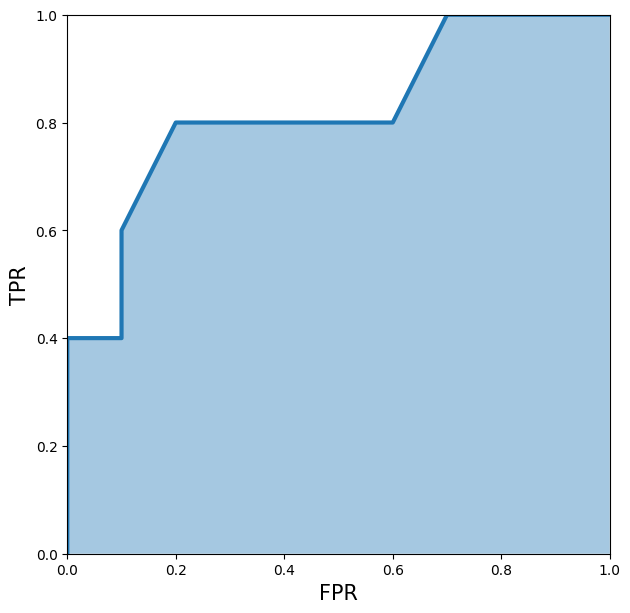

In [205]:
# AUC - Area Under Curve

tpr_list = []
fpr_list = []

y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_pred = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]

thresholds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.99,1.0]

#loop over thresholds
for thresh in thresholds:
  temp_pred = [1 if x>= thresh else 0 for x in y_pred]
  temp_tpr = tpr(y_true, temp_pred)
  temp_fpr = fpr(y_true, temp_pred)
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()




In [ ]:
# What is the AUC?
# It is the area under the curve - the dark area
# Perfect algorithm: AUC = 1
# Random algorithm: AUC = 0.5

metrics.roc_auc_score(y_true, y_pred)